In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from math import sqrt

In [3]:
df = pd.read_csv("D:/Excel/Crude-Oil_160101-221213.csv", index_col = "Date", parse_dates = True)
df.drop(df.columns[[0,1,2,4,5]], axis=1, inplace=True)
df

,Close
Date,
2016-01-04,36.76
2016-01-05,35.97
2016-01-06,33.97
2016-01-07,33.27
2016-01-08,33.16
...,...
2022-12-06,74.25
2022-12-07,72.01
2022-12-08,71.46


<AxesSubplot:xlabel='Date'>

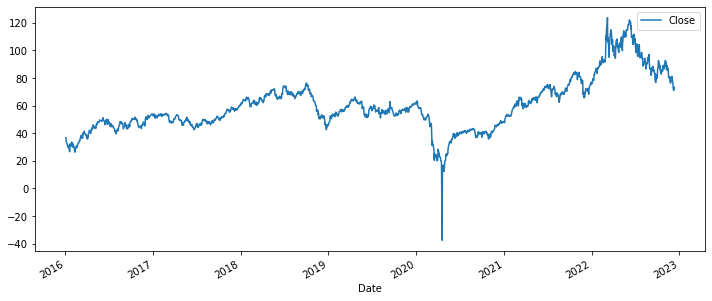

In [4]:
df.plot(y = 'Close', figsize = (12,5))

In [5]:
def ad_test(dataset):
    result = adfuller(dataset, autolag = 'AIC')
    print("1. ADF Statistic:" , result[0])
    print("2. p-value : ", result[1])
    print("3. Lags : ", result[2])
    print("4. Critical values :" , result[3])
    for key, val in result[4].items():
        print("\t", key ," ", val)
ad_test(df['Close'])

1. ADF Statistic: -1.9578315343434511
2. p-value :  0.3053628860646654
3. Lags :  3
4. Critical values : 1745
	 1%   -3.434102977404239
	 5%   -2.8631977303784235
	 10%   -2.5676525270728483


In [6]:
stepwise_fit = auto_arima(df['Close'], trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7901.505, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8023.213, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7920.704, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7901.420, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8021.345, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7898.028, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7899.545, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7899.537, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7898.800, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7905.640, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7896.357, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7899.696, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7918.917, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7897.893, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1749
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3945.178
Date:                Mon, 02 Jan 2023   AIC                           7896.357
Time:                        15:25:26   BIC                           7912.756
Sample:                             0   HQIC                          7902.419
                               - 1749                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2003      0.030      6.767      0.000       0.142       0.258
ma.L1         -0.4715      0.029    -16.233      0.000      -0.528      -0.415
sigma2         5.3441      0.018    302.269      0.000       5.309       5.379
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           3718382.44
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               5.14   Skew:                            -7.02
Prob(H) (two-sided):                  0.00   Kurtosis:                       228.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
def split_data(data, test_split):
    length = len(data)
    size = round(length * (1 - test_split))
    train, test = data[:size], data[size:]
    print('train:', len(train))
    print('test:', len(test))
    return train, test

In [8]:
test_split = 0.2
train, test = split_data(df, test_split)

train: 1399
test: 350


In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
model = sm.tsa.arima.ARIMA(train['Close'], order = (1,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1399
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3053.436
Date:                Mon, 02 Jan 2023   AIC                           6112.873
Time:                        15:25:26   BIC                           6128.601
Sample:                             0   HQIC                          6118.753
                               - 1399                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0682      0.016      4.224      0.000       0.037       0.100
ma.L1         -0.4627      0.016    -28.984      0.000      -0.494      -0.431
sigma2         4.6195      0.013    350.986      0.000       4.594       4.645
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           7575186.14
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               9.27   Skew:                           -12.02
Prob(H) (two-sided):                  0.00   Kurtosis:                       362.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
start = len(train)
end = len(train) + len(test) -1
pred = model.predict(start = start, end = end, typ = 'levels')

print(pred)
pred.index = df.index[start: end + 1]

1399    71.667312
1400    71.668492
1401    71.668572
1402    71.668578
1403    71.668578
          ...    
1744    71.668578
1745    71.668578
1746    71.668578
1747    71.668578
1748    71.668578
Name: predicted_mean, Length: 350, dtype: float64


<AxesSubplot:xlabel='Date'>

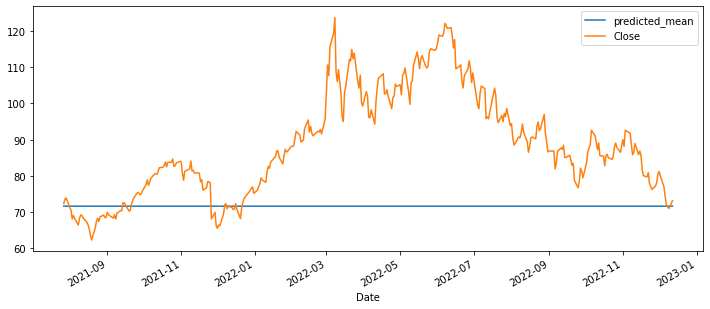

In [12]:
plt.figure(figsize = (12,5))
pred.plot(legend = True)
test['Close'].plot(legend= True)

In [13]:
test['Close'].mean()

88.58657142857138

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

mse =  mean_squared_error(pred, test['Close'])
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(pred, test['Close'])
print("RMSE: ", rmse)
print("MAPE: ", mape * 100)

RMSE:  22.213204535392247
MAPE:  24.788706359623095


In [15]:
future_days = pd.date_range(start = "07/26/2021", end = "01/11/2023")
pred = model.predict(start = len(df), end = len(df) + 534, typ = " levels").rename("Arima prediction")
pred.index = future_days

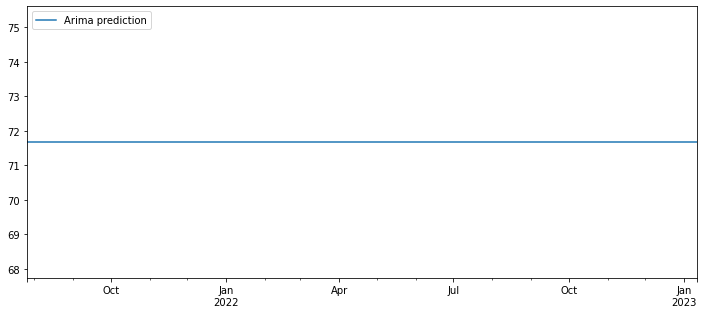

In [16]:
pred.plot(figsize = (12,5))
plt.legend(loc = 'upper left')

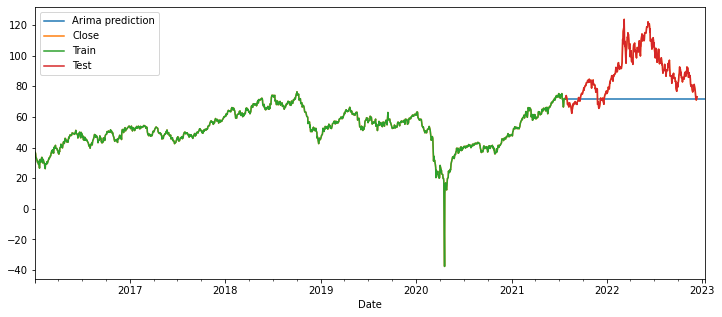

In [17]:
plt.figure(figsize = (12,5))
pred.plot()
df['Close'].plot()
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.legend(loc = 'upper left')
plt.show()